## INDIAN LIVER PATIENT DATASET

### Problem Statement
This data set contains __416__ liver patient records and __167__ non liver patient records collected from North East of
Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver
disease) or not (no disease). This data set contains __441__ male patient records and __142__ female patient records. <br>
_Use these patient records to determine which patients have liver disease and which ones do not._

* ### <a href='#dataset'> Loading the Dataset </a>
* ### <a href='#eda'> Exploratory Data Analysis </a>
* ### <a href='#model'> Training the Logisitic Regression Model </a>
* ### <a href='#svc'> Training the Support Vector Classifier Model </a>

In [7]:
# Future Imports
from __future__ import print_function, unicode_literals, absolute_import

# Removing Warnings
import warnings
warnings.filterwarnings('ignore')

# Data Cleaning/ Wrangling
from pandas import read_csv, DataFrame, get_dummies
import numpy as np
import itertools

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

# Data Manipulation and Modelling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, precision_recall_curve
from sklearn.metrics import roc_curve, confusion_matrix, auc, precision_score, recall_score, f1_score

<a id='dataset'></a>

In [8]:
%time
def load_dataset(filepath):
    ''' Loads the Dataset
        -------------
        Parameters: string
        -------------
        Return: dataframe
    '''
    filepath = './' +filepath+ '.csv'
    dataframe = read_csv(filepath)
    return dataframe

data = load_dataset('indian_liver_patient')

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 8.82 µs


In [9]:
%%time
data.head()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 513 µs


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


<a id='eda'></a>

First we need to understand our Data. Hence we will do some Exploratory Data Analysis and some Visual Representation to better understand what this data is telling us.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [11]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


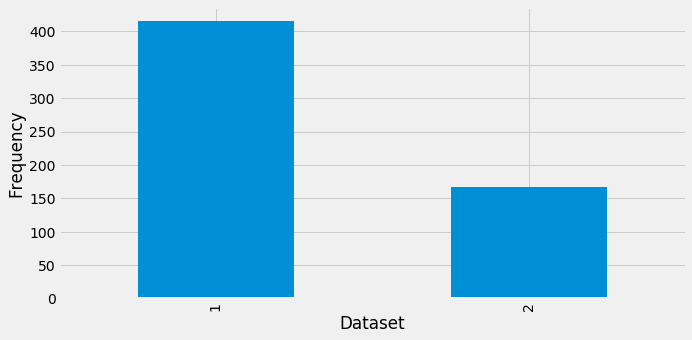

In [12]:
p = data.Dataset.value_counts().plot(kind='bar', figsize=(10,5), color=sns.color_palette()[0])
_ = p.set(xlabel='Dataset', ylabel='Frequency')

As given in the problem statement, number of liver patients is __416__ while non liver patients is __167__

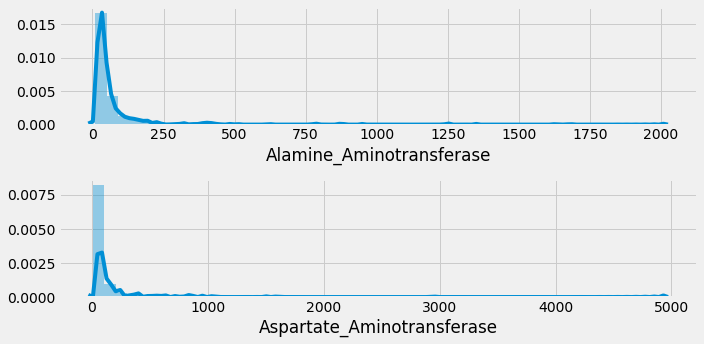

In [13]:
fig, ax = plt.subplots(2, 1, figsize=(10,5))
p = sns.distplot(data.Alamine_Aminotransferase, bins=50, ax=ax[0], axlabel='Alamine_Aminotransferase')
p = sns.distplot(data.Aspartate_Aminotransferase, bins=50, ax=ax[1])
plt.tight_layout()

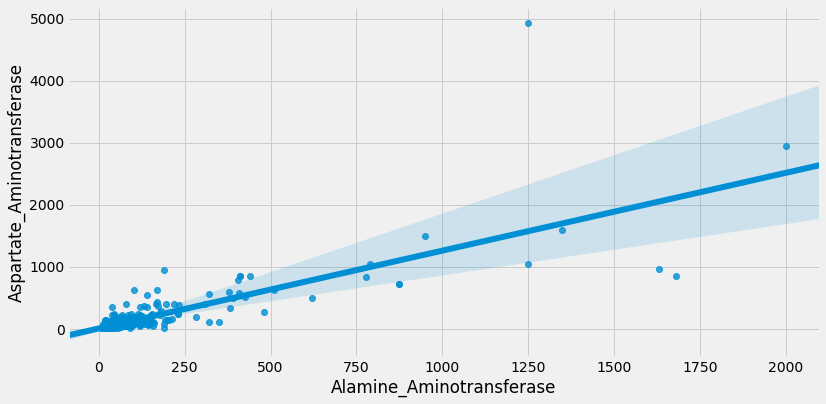

In [14]:
fig = plt.figure(figsize=(12,6))
p = sns.regplot(x=data.Alamine_Aminotransferase, y=data.Aspartate_Aminotransferase, data=data)

Both these variables are highly correlated and are skewed towards left. Also they are having few of the outliers.

In [15]:
%time
def preprocessing(data):
    data2 = data.copy(deep=True)
    numerical_features = data2.drop(['Dataset', 'Gender'], axis=1)
    label = data2.Dataset.map({1:0, 2:1})
    numerical_features.Albumin_and_Globulin_Ratio.fillna(0, inplace=True)
    scaler = StandardScaler()
    scaled = scaler.fit_transform(numerical_features)
    dataframe = DataFrame(scaled, columns=numerical_features.columns)
    dataframe['Gender'] = data2.Gender
    data3 = get_dummies(dataframe)
    return data3, label

features, label = preprocessing(data)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 9.06 µs


In [16]:
features.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Female,Gender_Male
0,1.252098,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.123797,1,0
1,1.066637,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.612077,0,1
2,1.066637,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.154315,0,1
3,0.819356,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.181378,0,1
4,1.684839,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.649672,0,1


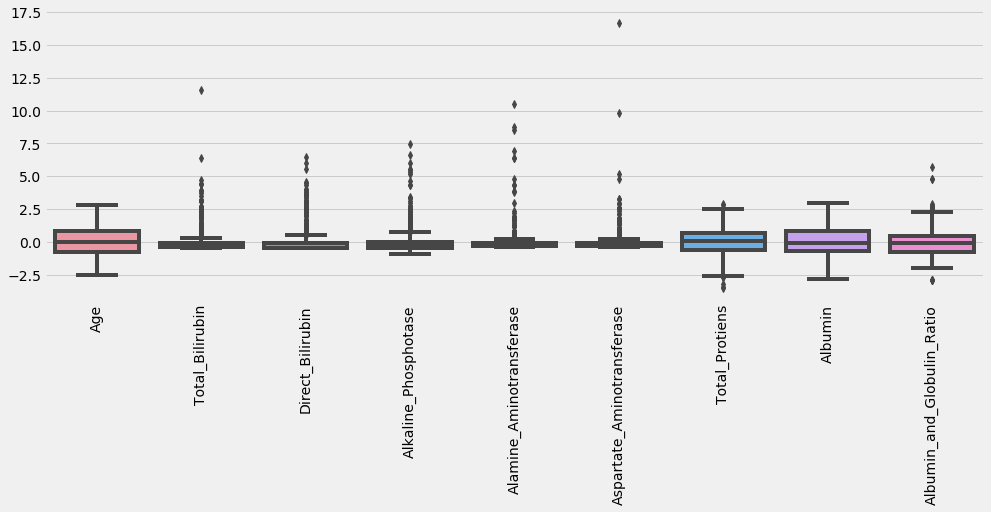

In [17]:
fig = plt.figure(figsize=(15,5))
p = sns.boxplot(data=features.iloc[:, 0:9])
_ = plt.xticks(rotation='vertical')

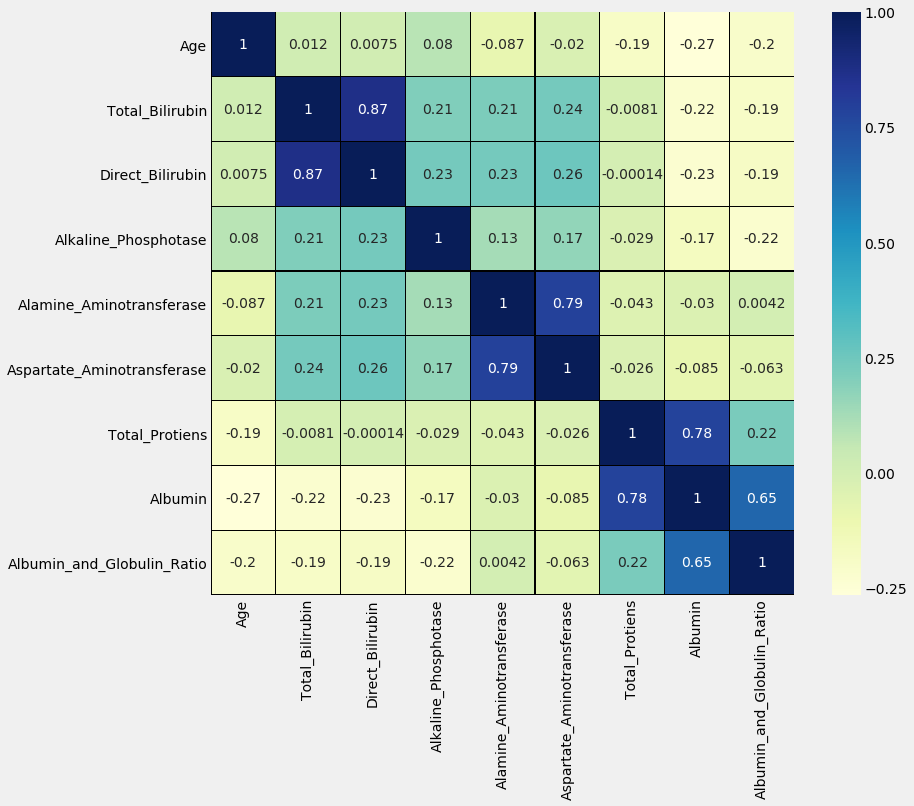

In [18]:
correlation = features.iloc[:, 0:9].corr()
p = plt.subplots(figsize=(12,10))
p = sns.heatmap(correlation, cbar=True, annot=True, cmap='YlGnBu', square=True, linecolor='black', linewidths=0.25)

<a id='model'></a>

To classify into one class, we will be using two machine learning algorithms - Support Vector Machines and Logistic Regression.

In [19]:
%time
def model(X, y, model):
    ''' fits a machine learning model and evalutes it.
        ---------------
        Parameters: dataframe, model
        ---------------
        Return: array, dataframe
    '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    clf = model
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    score = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    fscore = f1_score(y_test, predictions)
    print ('Train Independent Variable {}'.format(X_train.shape))
    print ('Train Dependent Variable {}'.format(y_train.shape))
    print ('Test Independent Variable {}'.format(X_test.shape))
    print ('Test Dependent Variable {}'.format(y_test.shape))
    print ('The Accuracy Score is: {}'.format(score))
    print ('Precision is: {}'.format(precision))
    print ('Recall is: {}'.format(recall))
    print ('F1-Score is: {}'.format(fscore))
    return predictions, y_test

log_pred, y_test_log = model(features, label, LogisticRegression())

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 6.91 µs
Train Independent Variable (408, 11)
Train Dependent Variable (408,)
Test Independent Variable (175, 11)
Test Dependent Variable (175,)
The Accuracy Score is: 0.691428571429
Precision is: 0.47619047619
Recall is: 0.188679245283
F1-Score is: 0.27027027027


In [20]:
new_features = features[['Age', 'Total_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Total_Protiens', 'Albumin_and_Globulin_Ratio', 'Gender_Male', 'Gender_Female']]
new_log_pred, new_y_test_log = model(new_features, label, LogisticRegression())

Train Independent Variable (408, 8)
Train Dependent Variable (408,)
Test Independent Variable (175, 8)
Test Dependent Variable (175,)
The Accuracy Score is: 0.708571428571
Precision is: 0.5625
Recall is: 0.169811320755
F1-Score is: 0.260869565217


In [21]:
%time
def roc_curve_log(y, pred):
    ''' true positive rate, false positive rate
    '''
    true_positive_rate, false_positive_rate, threshold = roc_curve(y, pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    return true_positive_rate, false_positive_rate, roc_auc
    
# true_positive_rate_log, false_positive_rate_log, roc_auc_log = roc_curve_log(y_test_log, log_pred)
new_true_positive_rate_log, new_false_positive_rate_log, new_roc_auc_log = roc_curve_log(new_y_test_log, new_log_pred)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.96 µs


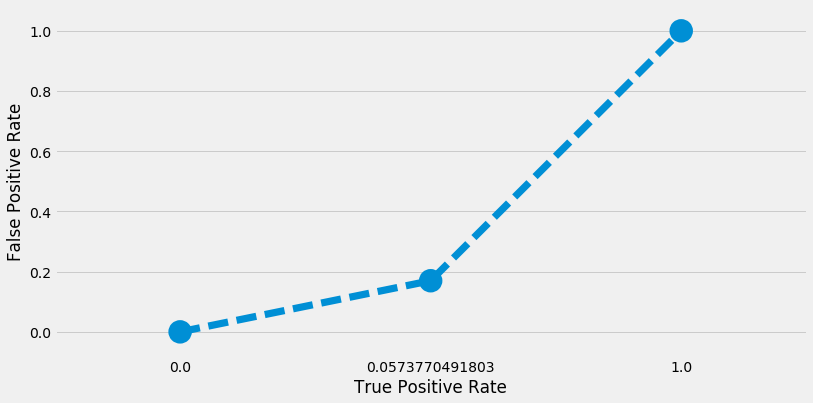

In [22]:
fig = plt.figure(figsize=(12,6))
P = sns.pointplot(x=new_true_positive_rate_log, y=new_false_positive_rate_log, label='AUC = %0.2f'% new_roc_auc_log, linestyles='--')
_ = plt.ylabel('False Positive Rate')
_ = plt.xlabel('True Positive Rate')
_ = plt.legend(loc='lower left')

In [23]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the testing dataset:  0


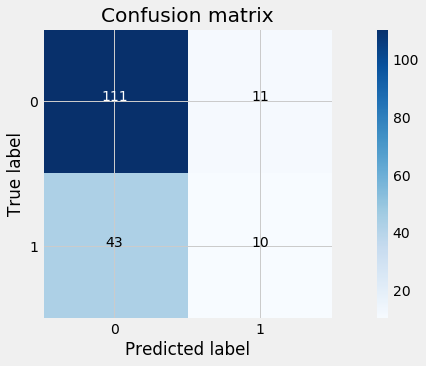

In [24]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_log, log_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure(figsize=(12,5))
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

Recall metric in the testing dataset:  0


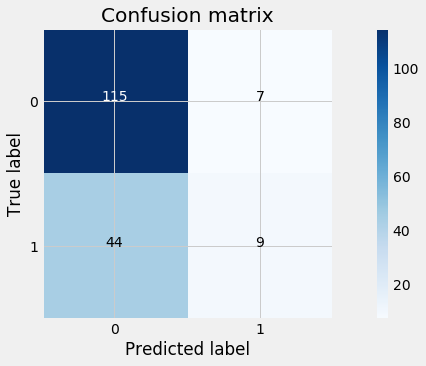

In [25]:
cnf_matrix = confusion_matrix(new_y_test_log, new_log_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure(figsize=(12,5))
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

<a id='svc'></a>

In [26]:
rc_pred, y_test_rc = model(features, label, SVC(random_state=0, kernel='rbf'))

Train Independent Variable (408, 11)
Train Dependent Variable (408,)
Test Independent Variable (175, 11)
Test Dependent Variable (175,)
The Accuracy Score is: 0.691428571429
Precision is: 0.0
Recall is: 0.0
F1-Score is: 0.0


In [27]:
new_rc_pred, new_y_test_rc = model(new_features, label, SVC(random_state=0, kernel='rbf'))
true_positive_rate_rc, false_positive_rate_rc, roc_auc_rc = roc_curve_log(y_test_rc, rc_pred)

Train Independent Variable (408, 8)
Train Dependent Variable (408,)
Test Independent Variable (175, 8)
Test Dependent Variable (175,)
The Accuracy Score is: 0.691428571429
Precision is: 0.333333333333
Recall is: 0.0188679245283
F1-Score is: 0.0357142857143


Recall metric in the testing dataset:  0


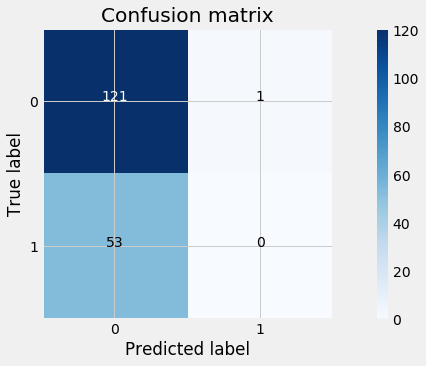

In [28]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_rc, rc_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure(figsize=(12,5))
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

Recall metric in the testing dataset:  0


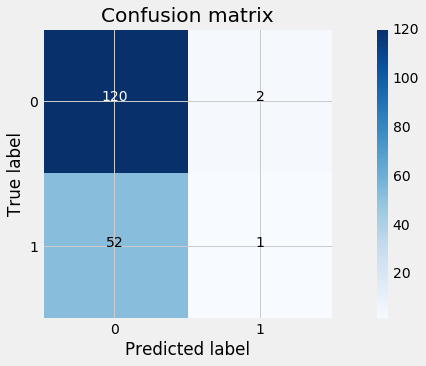

In [29]:
cnf_matrix = confusion_matrix(new_y_test_rc, new_rc_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure(figsize=(12,5))
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

#### Although Logistic Regression performed better as SVC tried to overfit the dataset, we still need to optimize the model because it is showing that most of the data points in our test data has liver disease which can not be true.
#### Feature Engineering did little impact on the accuracy score, but decrease the value of precision. Hence, it can be taken under consideration for better optimization.